# Capstone Project - Car Accident Severity

### IBM Coursera

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
df_data_1.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [7]:
df_data_1.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [8]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [10]:
df_data_1['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [11]:
df_data_1['SEVERITYCODE.1'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE.1, dtype: int64

In [12]:
%%capture
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
df_data_1['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

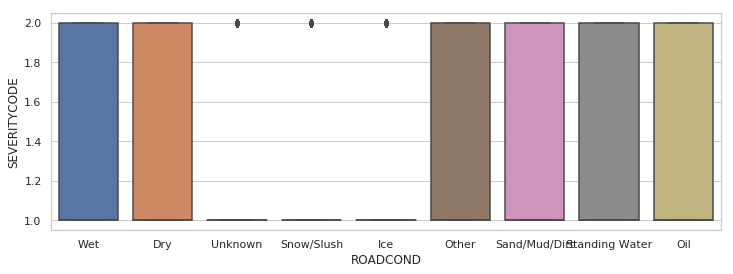

In [15]:
sns.set(rc={'figure.figsize':(12,4)}, font_scale=1, style='whitegrid')
sns.boxplot(x="ROADCOND", y="SEVERITYCODE", data=df_data_1)

In [16]:
df_data_1['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

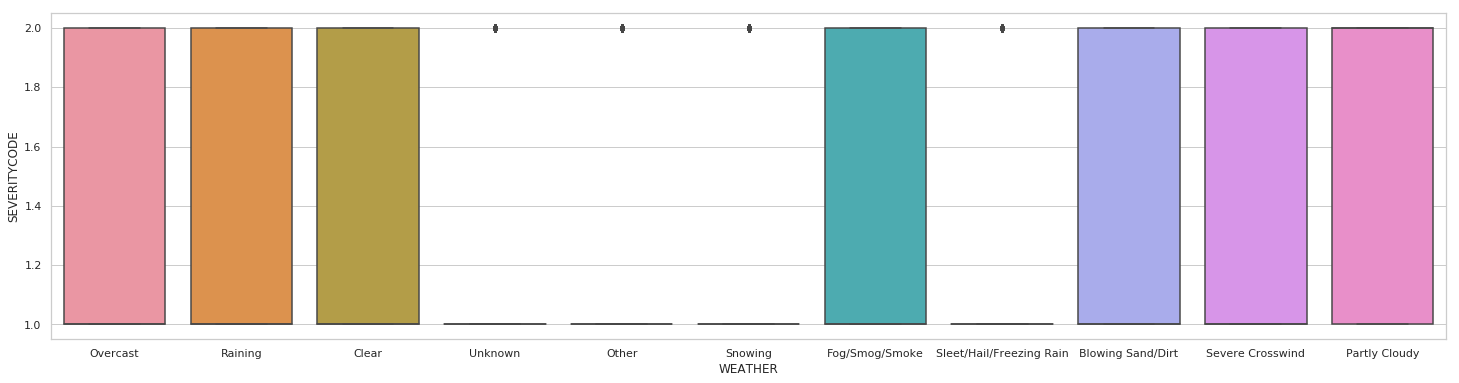

In [17]:
sns.set(rc={'figure.figsize':(25,6)}, font_scale=1, style='whitegrid')
sns.boxplot(x="WEATHER", y="SEVERITYCODE", data=df_data_1)

In [18]:
df_data_1['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

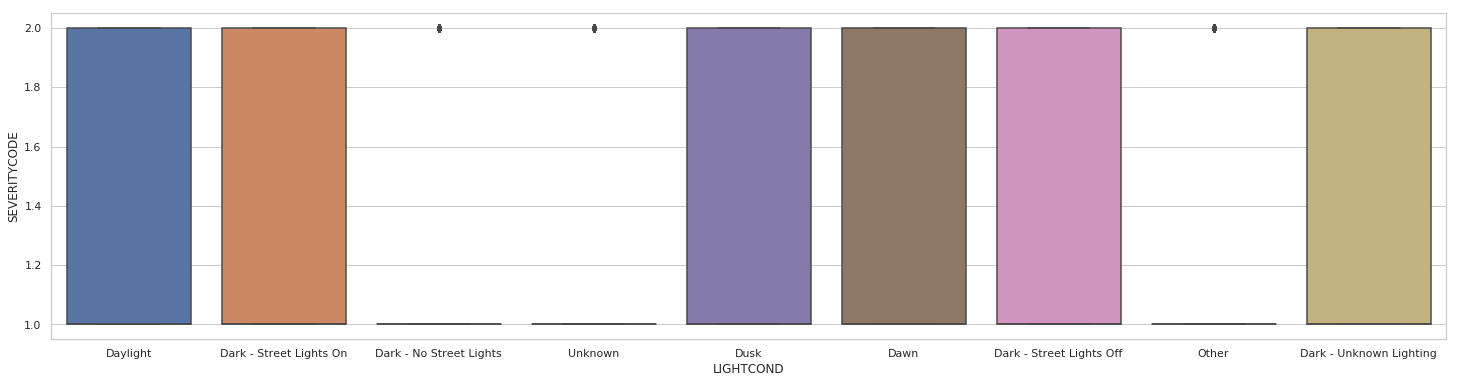

In [19]:
sns.set(rc={'figure.figsize':(25,6)}, font_scale=1, style='whitegrid')
sns.boxplot(x="LIGHTCOND", y="SEVERITYCODE", data=df_data_1)

In [20]:
df_data_1['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

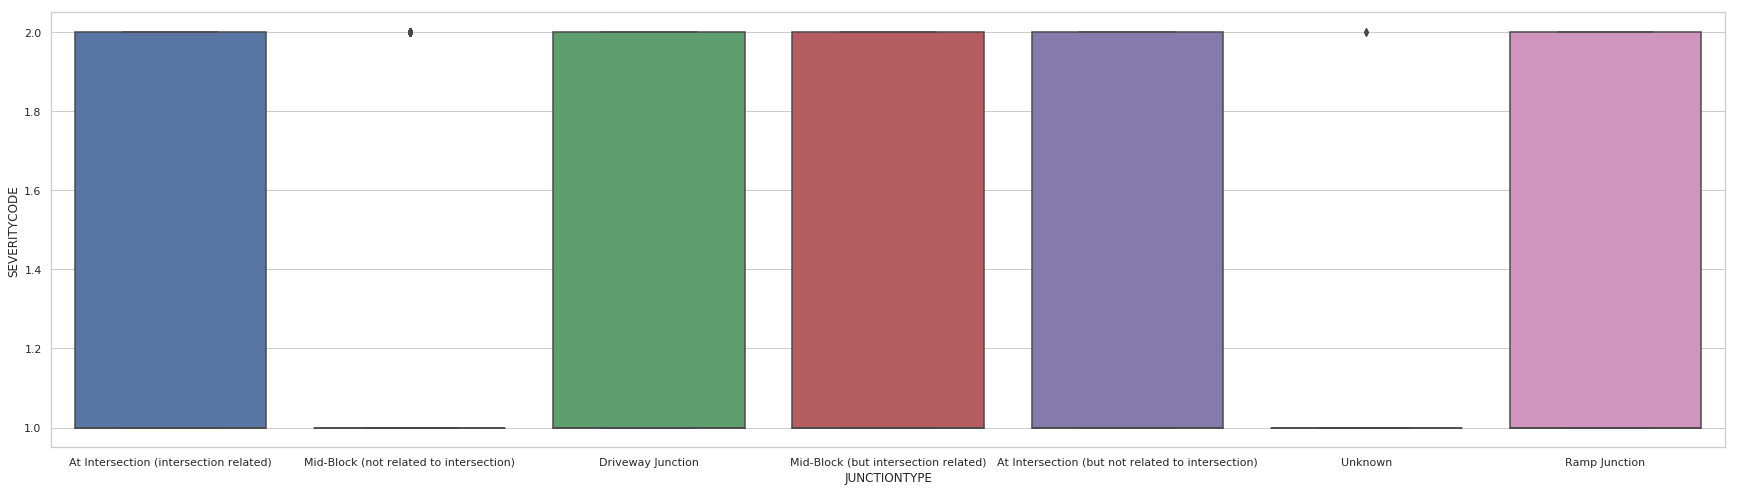

In [21]:
sns.set(rc={'figure.figsize':(30,8)}, font_scale=1, style='whitegrid')
sns.boxplot(x="JUNCTIONTYPE", y="SEVERITYCODE", data=df_data_1)

In [22]:
df_data_1['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [23]:
df_groupanalysis = df_data_1[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND','JUNCTIONTYPE','SPEEDING']]

In [24]:
grouped = df_groupanalysis.groupby(['WEATHER','ROADCOND','LIGHTCOND','JUNCTIONTYPE','SPEEDING'], as_index=False).mean()
large = grouped.nlargest(20,"SEVERITYCODE")
large

,WEATHER,ROADCOND,LIGHTCOND,JUNCTIONTYPE,SPEEDING,SEVERITYCODE
15,Clear,Dry,Dark - Street Lights On,Unknown,Y,2.0
17,Clear,Dry,Dawn,Driveway Junction,Y,2.0
41,Clear,Ice,Dark - Street Lights On,Ramp Junction,Y,2.0
52,Clear,Other,Daylight,At Intersection (intersection related),Y,2.0
53,Clear,Other,Daylight,Driveway Junction,Y,2.0
65,Clear,Snow/Slush,Unknown,Mid-Block (not related to intersection),Y,2.0
69,Clear,Unknown,Dark - Street Lights On,Mid-Block (but intersection related),Y,2.0
82,Clear,Wet,Dawn,At Intersection (intersection related),Y,2.0
91,Clear,Wet,Other,Mid-Block (not related to intersection),Y,2.0
95,Fog/Smog/Smoke,Dry,Dark - Street Lights On,Mid-Block (but intersection related),Y,2.0


In [26]:
#now, we will do modelling. we choose these 3 variabel below to do
#ROADCOND, LIGHTCOND, and JUNCTIONTYPE
df_group = df_data_1[["SEVERITYCODE","ROADCOND","WEATHER","LIGHTCOND","JUNCTIONTYPE"]]

df2 = df_group[(df_group["ROADCOND"]=="Dry")|
               (df_group["ROADCOND"]=="Wet")|
               (df_group["ROADCOND"]=="Ice")|
               (df_group["ROADCOND"]=="Snow/Slush")|
               (df_group["ROADCOND"]=="Standing Water")]

df3 = df2[(df2["WEATHER"]=="Clear")|
          (df2["WEATHER"]=="Raining")|
          (df2["WEATHER"]=="Overcast")|
          (df2["WEATHER"]=="Snowing")| 
          (df2["WEATHER"]=="Fog/Smog/Smoke")]

df4 = df3[(df3["LIGHTCOND"]=="Daylight")|
          (df3["LIGHTCOND"]=="Dark - Street Lights On")|
          (df3["LIGHTCOND"]=="Dusk")|
          (df3["LIGHTCOND"]=="Dawn")| 
          (df3["LIGHTCOND"]=="Dark - No Street Lights")]

df5 = df4[(df4["JUNCTIONTYPE"]=="Mid-Block (not related to intersection)")|
          (df4["JUNCTIONTYPE"]=="At Intersection (intersection related)")|
          (df4["JUNCTIONTYPE"]=="Mid-Block (but intersection related)")|
          (df4["JUNCTIONTYPE"]=="Driveway Junction")|
          (df4["JUNCTIONTYPE"]=="At Intersection (but not related to intersection)")|
          (df4["JUNCTIONTYPE"]=="Ramp Junction")]

In [27]:
df_road = df5["ROADCOND"].value_counts().to_frame().reset_index()
df_road.index+=1
df_road

,index,ROADCOND
1,Dry,118965
2,Wet,45209
3,Ice,1031
4,Snow/Slush,784
5,Standing Water,99


In [30]:
df_road = df5["WEATHER"].value_counts().to_frame().reset_index()
df_road.index+=1
df_road

,index,WEATHER
1,Clear,106576
2,Raining,31890
3,Overcast,26299
4,Snowing,799
5,Fog/Smog/Smoke,524


In [31]:
df_light = df5["LIGHTCOND"].value_counts().to_frame().reset_index()
df_light.index+=1
df_light

,index,LIGHTCOND
1,Daylight,110882
2,Dark - Street Lights On,45951
3,Dusk,5554
4,Dawn,2359
5,Dark - No Street Lights,1342


In [32]:
df_junction = df5["JUNCTIONTYPE"].value_counts().to_frame().reset_index()
df_junction.index+=1
df_junction

,index,JUNCTIONTYPE
1,Mid-Block (not related to intersection),74276
2,At Intersection (intersection related),58972
3,Mid-Block (but intersection related),21004
4,Driveway Junction,9903
5,At Intersection (but not related to intersection),1780
6,Ramp Junction,153


In [33]:
#Replacing strings data with numerical value

df5 = df5.replace({"ROADCOND" : {"Dry" : 1, 
                                 "Wet" : 2, 
                                 "Ice" : 3, 
                                 "Snow/Slush" : 4, 
                                 "Standing Water" : 5}})

df5 = df5.replace({"WEATHER" : {"Clear" : 1, 
                                "Raining" : 2, 
                                "Overcast" : 3, 
                                "Snowing" : 4, 
                                "Fog/Smog/Smoke" : 5}})

df5 = df5.replace({"LIGHTCOND" : {"Daylight" : 1, 
                                  "Dark - Street Lights On" : 2, 
                                  "Dusk" : 3, 
                                  "Dawn" : 4, 
                                  "Dark - No Street Lights" : 5}})

df5 = df5.replace({"JUNCTIONTYPE" : {"Mid-Block (not related to intersection)" : 1, 
                                     "At Intersection (intersection related)" : 2, 
                                     "Mid-Block (but intersection related)" : 3, 
                                     "Driveway Junction" : 4, 
                                     "At Intersection (but not related to intersection)" : 5, 
                                     "Ramp Junction" : 6}})

df5.head()

,SEVERITYCODE,ROADCOND,WEATHER,LIGHTCOND,JUNCTIONTYPE
0,2,2,3,1,2
1,1,2,2,2,1
2,1,1,3,1,1
3,1,1,1,1,1
4,2,2,2,1,2


In [35]:
X = df5.drop(["SEVERITYCODE"],axis=1)
y = df5["SEVERITYCODE"].values

print("X\n",X.head(),"\ny\n",y[0:5])

X
    ROADCOND  WEATHER  LIGHTCOND  JUNCTIONTYPE
0         2        3          1             2
1         2        2          2             1
2         1        3          1             1
3         1        1          1             1
4         2        2          1             2 
y
 [2 1 1 1 2]


In [36]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=4)

print("X_train size is ", X_train.shape, "\nX_test size is ", X_test.shape, 
      "\ny_train size is ", y_train.shape, "\ny_test size is ", y_test.shape)

X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))

X_train size is  (132870, 4) 
X_test size is  (33218, 4) 
y_train size is  (132870,) 
y_test size is  (33218,)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [40]:
import sklearn

Ks = 10   
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

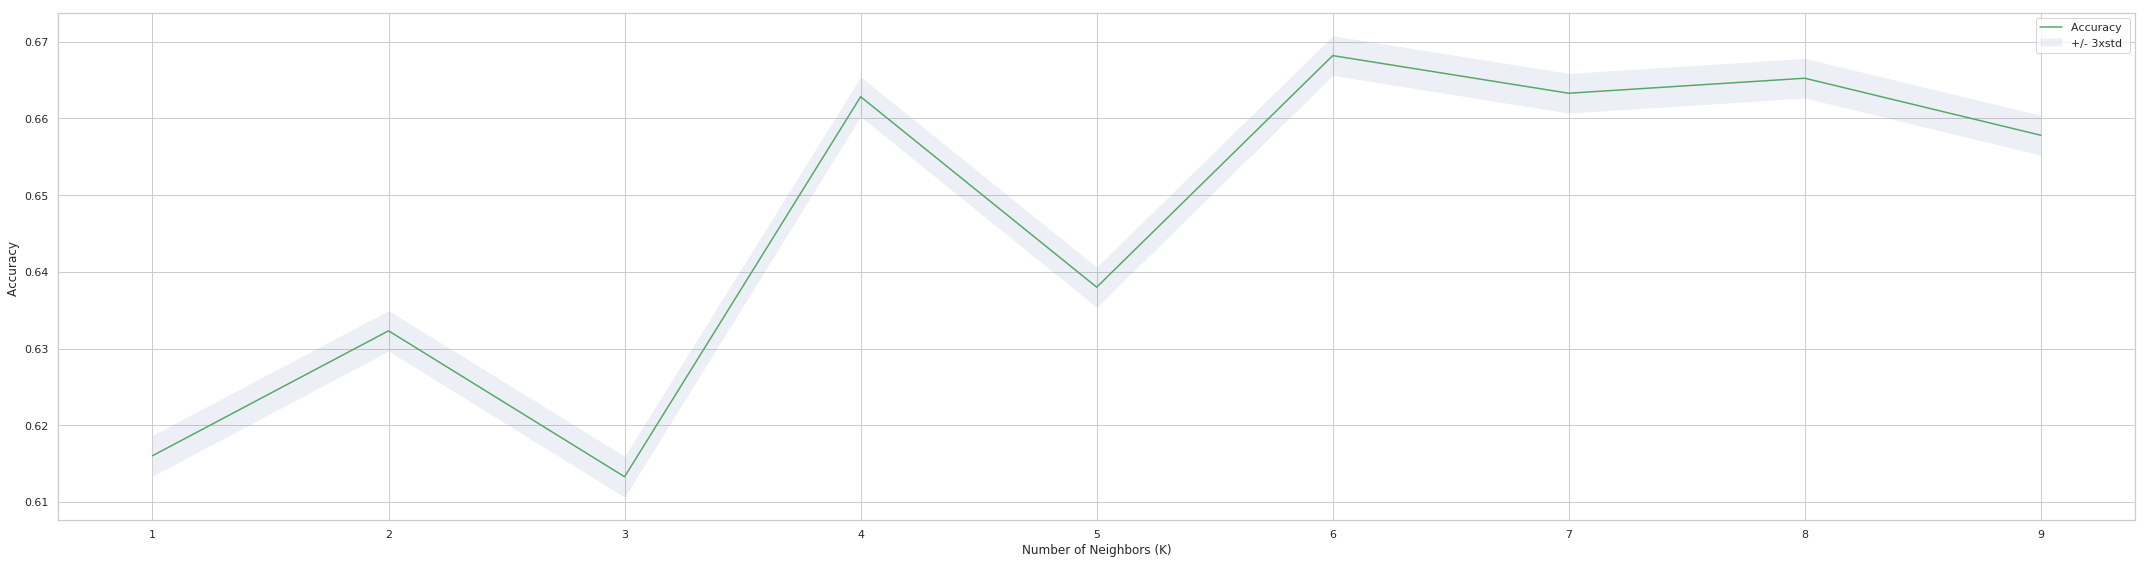

The best accuracy was with 0.6681919441266783 with k = 6


In [41]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1)